In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv('D:\\Assignment\\Assignment4_Simple linear reg\\Salary_Data.csv')

In [3]:
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [4]:
# check null values

data1.isnull().any(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [5]:
data1.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
data1.isnull().shape

(30, 2)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
# Duplicated Rows
data1[data1.duplicated()].shape

(0, 2)

In [10]:
data2 = data1.rename({"YearsExperience":"ye","Salary":"sa"},axis=1)

In [11]:
data2.head()

,ye,sa
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
# Data Visualization
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ye', ylabel='Density'>

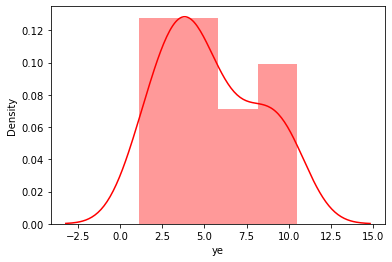

In [13]:
#Distplot
sns.distplot(data2['ye'],color='red')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sa', ylabel='Density'>

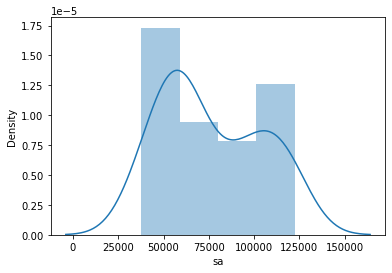

In [14]:
sns.distplot(data2['sa'])

In [15]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

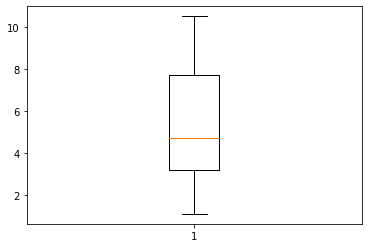

In [16]:
# Boxplot
plt.boxplot(data2['ye'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

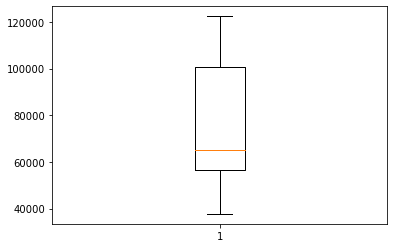

In [17]:
plt.boxplot(data2['sa'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

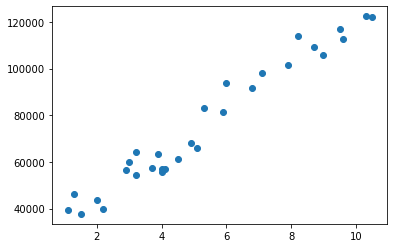

In [18]:
# Scatter plot

plt.scatter(x=data2['ye'],y=data2['sa'])
plt.show

In [19]:
# Correlation (r)
data2.corr()

,ye,sa
ye,1.000000,0.978242
sa,0.978242,1.000000


<AxesSubplot:xlabel='ye', ylabel='sa'>

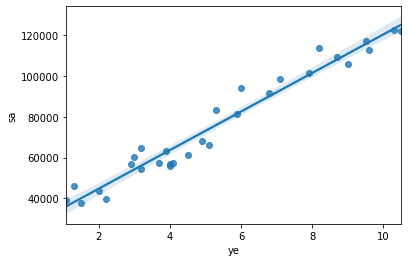

In [20]:
# regression plot
sns.regplot(x=data2['ye'],y=data2['sa'])  # or    sns.regplot(x='ye',y='sa' , data=data2

In [21]:
# Model building
import statsmodels.formula.api as smf

In [22]:
model = smf.ols("sa~ye",data=data2).fit()

In [23]:
model

In [24]:
# Model testing
#y = mx + c
model.params

Intercept    25792.200199
ye            9449.962321
dtype: float64

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sa   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        10:53:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y =  9449.962321*(4) +  25792.20019

In [27]:
y

63592.049474

In [28]:
# find t value and p value
model.tvalues , model.pvalues

(Intercept    11.346940
 ye           24.950094
 dtype: float64,
 Intercept    5.511950e-12
 ye           1.143068e-20
 dtype: float64)

In [29]:
# r squared

model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [30]:
# Model prediction

In [31]:
new_data = pd.Series([2,4])

In [32]:
data_pred = pd.DataFrame(new_data,columns=['ye'])

In [33]:
data_pred

,ye
0,2
1,4


In [34]:
model.predict(data_pred)

0    44692.124842
1    63592.049484
dtype: float64

# end